## Model S (from Scratch) - sin data augmentation, sin nada.

In [20]:
#Showing directories’ size
import os, shutil

train_dir ='./train'
validation_dir = './val'
test_dir = './test'

train_organic_dir = './train/O'
train_recicle_dir = './train/R'

val_organic_dir = './val/O'
val_recicle_dir = './val/R'

test_organic_dir = './test/O'
test_recicle_dir = './test/R'


print('total train organic images:', len(os.listdir(train_organic_dir)))
print('total train recicle images:', len(os.listdir(train_recicle_dir)))


print('total validation organic images:', len(os.listdir(val_organic_dir)))
print('total validation recicle images:', len(os.listdir(val_recicle_dir)))


print('total testing organic images:', len(os.listdir(test_organic_dir)))
print('total testing recicle images:', len(os.listdir(test_recicle_dir)))

total train organic images: 2500
total train recicle images: 2500
total validation organic images: 1500
total validation recicle images: 1500
total testing organic images: 1401
total testing recicle images: 1112


In [22]:
# Preprocessing the data

from keras.utils import image_dataset_from_directory

IMG_SIZE = 150
train_dataset = image_dataset_from_directory(
train_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
validation_dataset = image_dataset_from_directory(
validation_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
test_dataset = image_dataset_from_directory(
test_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)

Found 4998 files belonging to 2 classes.
Found 2998 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.


In [25]:
# The shape of each batch
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


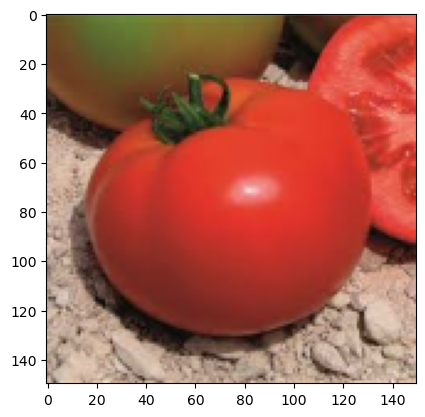

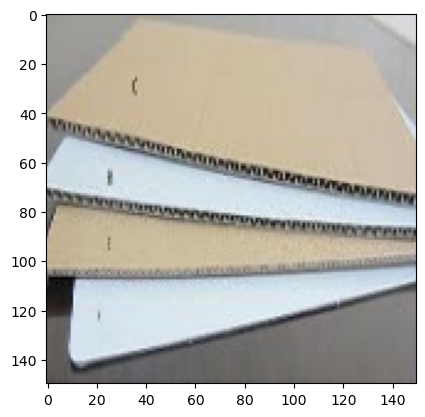

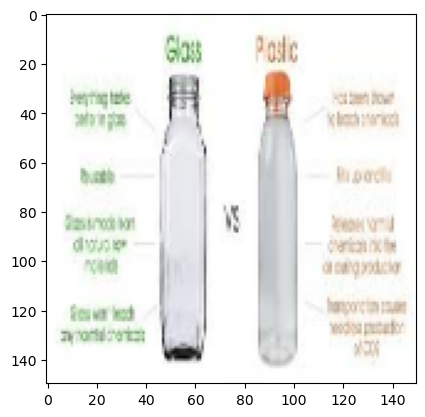

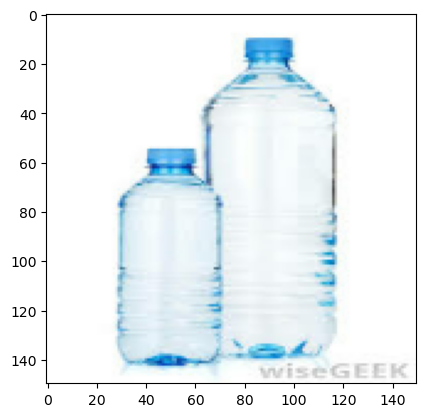

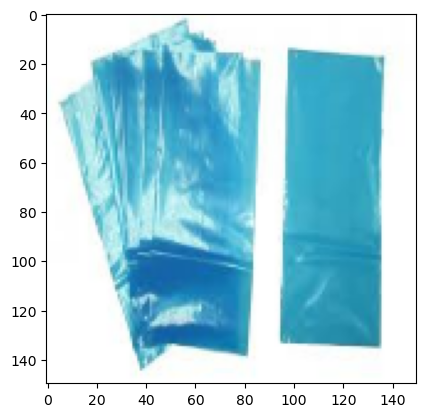

2024-05-29 20:40:04.114147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [30]:
#Viewing the first 5 images of the first batch
import matplotlib.pyplot as plt
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [34]:
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [41]:
import tensorflow as tf
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc'])

In [43]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 58s 362ms/step - acc: 0.4996 - loss: 0.6972 - val_acc: 0.5030 - val_loss: 0.6931
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 62s 396ms/step - acc: 0.4976 - loss: 0.6938 - val_acc: 0.5053 - val_loss: 0.6931
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 59s 373ms/step - acc: 0.4929 - loss: 0.6935 - val_acc: 0.5130 - val_loss: 0.6931
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 55s 348ms/step - acc: 0.4857 - loss: 0.6934 - val_acc: 0.4927 - val_loss: 0.6932
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 363ms/step - acc: 0.4986 - loss: 0.6933 - val_acc: 0.4923 - val_loss: 0.6932
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 361ms/step - acc: 0.5032 - loss: 0.6933 - val_acc: 0.4880 - val_loss: 0.6931
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 361ms/step - acc: 0.5039 - loss: 0.6933 - val_acc: 0.4967 - val_loss: 0.6932
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 365ms/step - acc: 0.5062 - loss: 0.6933 - val_acc: 0.5090 - val_loss: 0.6931
Epoch 9/30
157/157 ━━━━━━━━━━━━━

In [47]:
model.save('./Model_S.h5')

In [50]:
from tensorflow import keras
model = keras.models.load_model('./Model_S.h5')

In [53]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - acc: 0.4971 - loss: 0.6932
val_acc: 0.5036690831184387


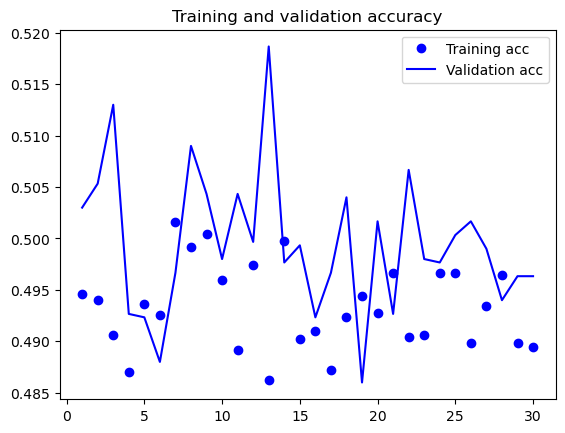

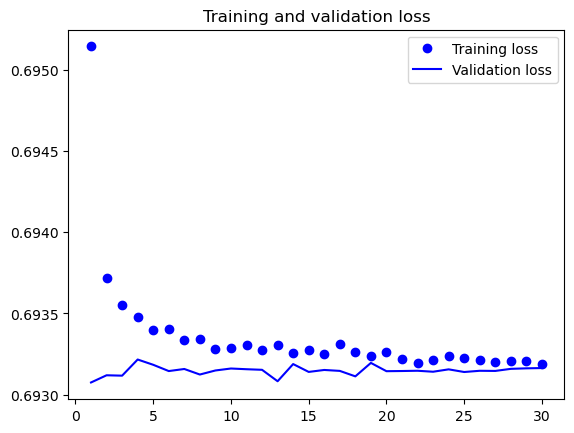

In [55]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show() 